# Homework 4

## 1) Preprocess Dataset

In [148]:
# import needed libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [149]:
# load dataset
df = pd.read_csv("diabetes.csv")

In [150]:
# check for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [151]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [152]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [153]:
# separate input from output variables
x = df.drop(columns=['Outcome'])
y = df['Outcome']

# normalize data as requested
scaler = MinMaxScaler()
X = scaler.fit_transform(x)

# keep as a DataFrame for convenience when inspecting
X = pd.DataFrame(X, columns=x.columns)

## 2) Part A: Clustering

### 1.

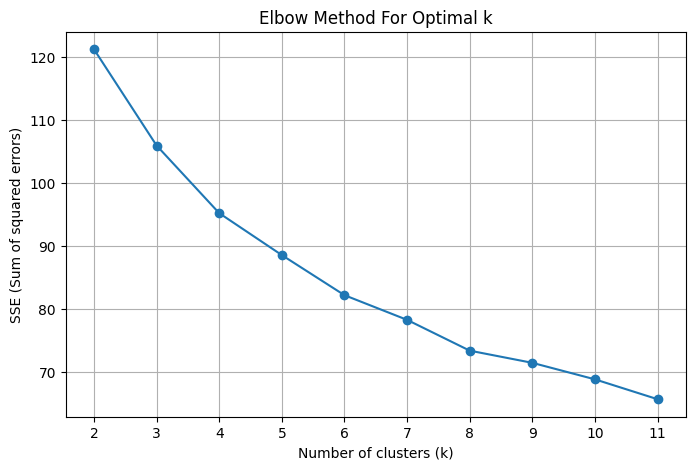

In [154]:
k_means_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
sse = []

# calculate SSE for each k
for k in k_means_values:
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_) # inertia_ is the SSE

# Plot the graph
plt.figure(figsize=(8, 5))
plt.plot(k_means_values, sse, marker='o')
plt.xticks(k_means_values)
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Sum of squared errors)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

### 2.

In [ ]:
# fit KMeans with k=6
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X)

# classify based on majority class of the cluster

# Map clusters to majority class
cluster_to_majority = {}
for cluster_id in range(6):
    labels_in_cluster = y[clusters == cluster_id]
    majority_class = np.bincount(labels_in_cluster).argmax() # counts how many times each class appears in the cluster and choose the most often one
    cluster_to_majority[cluster_id] = majority_class

# Predicted labels based on majority class
y_pred = np.array([cluster_to_majority[c] for c in clusters])

# compute the confusion matrix, accuracy, precision, recall and F1-score
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", cm)

accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y, y_pred, average='weighted')
print("Precision:", precision)

recall = recall_score(y, y_pred, average='weighted')
print("Recall:", recall)

f1 = f1_score(y, y_pred, average='weighted')
print("F1-score:", f1)

Confusion Matrix:
 [[390 110]
 [119 149]]
Accuracy: 0.7018229166666666
Precision: 0.6995855884301365
Recall: 0.7018229166666666
F1-score: 0.7006066409587589


# ISTO NÃO ESTÁ ACABADO

Although the model achieved moderate performance (accuracy, precisio, recall and F1-score ≈ 0.70), it cannot be considered a good classification model. 

K-Means is an unsupervised algorithm, meaning it has no prior knowledge of the dataset’s true labels.


K-Means is an unsupervised algorithm, which means it does not have the information about the dataset before, what K-Means does is that groups data based on feature similarity rather than class labels. The relatively good metrics suggest that the data has some natural separability that aligns with the true classes, but this alignment is coincidental.

Unlike supervised classifiers, K-Means does not learn decision boundaries that minimize classification errors and therefore may not generalize well to new data. Additionally, clustering assumes spherical, equally sized clusters, which rarely matches real class distributions. In conclusion, while K-Means can reveal useful structure in the data, it is not suitable as a reliable classification model.


Discussion

Is this a good classification model?
Usually no, because K-Means is unsupervised:

It tries to minimize distances in feature space, not to separate classes.

Clusters may contain mixed classes, especially if classes overlap in feature space.

Accuracy can sometimes be better than random if classes are naturally separated, but it’s generally much worse than supervised classifiers like Logistic Regression, Random Forest, or SVM.

Limitations of clustering for classification:

No class information used → clusters may not align with true labels.

Sensitive to scaling → must normalize features.

Number of clusters (k) is arbitrary → wrong k leads to poor mapping.

Imbalanced classes → majority class mapping can bias predictions.

Non-convex class shapes → K-Means assumes spherical clusters; non-linear class boundaries are poorly captured.

✅ In short: Clustering can give a rough guess of classes if they naturally group in feature space, but it is not a reliable classification method.

### 3.

## 3) Part B: PCA

### 1.

### 2.

### 3.

### 4.